# **métaheuristiques de voisinage-Résolution du Problème du Voyageur de Commerce avec Algorithme du Recuit simule, RS,  RT.**


# **Importation des modules et des données :**
Dans cette section, nous importons les modules nécessaires à l'exécution de notre code. Nous utilisons xml.etree.ElementTree, qui est une bibliothèque Python destinée à la manipulation et à l'analyse de documents XML, ainsi que numpy, scipy et matplotlib pour effectuer des calculs et visualiser les résultats.

In [66]:
import os
import numpy as np
from scipy.sparse.csgraph import minimum_spanning_tree
from scipy.sparse import csr_matrix
maxsize = float('inf')
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import random
import math
from sys import maxsize

# **Chargement des Données et Construction de la Matrice des Distances :**

---


Dans cette partie du code, nous chargeons les données à partir d'un fichier XML qui contient les informations sur les villes et leurs coordonnées. Nous utilisons la bibliothèque xml.etree.ElementTree pour parcourir le fichier XML et extraire ces données nécessaires. Après avoir initialisé une matrice des distances de taille appropriée, nous parcourons chaque nœud dans le fichier XML pour obtenir les informations sur les arêtes connectées à chaque ville. Nous utilisons ces informations pour remplir la matrice des distances, où chaque élément de la matrice représente le coût pour se rendre d'une ville à une autre. Enfin, nous affichons la matrice des distances pour vérifier que les données ont été correctement chargées. Cette étape est cruciale car elle prépare les données nécessaires pour résoudre le problème du voyageur de commerce.

In [67]:
# Charger le fichier XML
tree = ET.parse('data.xml')
root = tree.getroot()

# Initialiser la matrice des distances
nombre_villes = 17
matrice_distances = np.zeros((nombre_villes, nombre_villes))

# Remplir la matrice des distances
for i, vertex in enumerate(root.find('graph').findall('vertex')):
    for edge in vertex.findall('edge'):
        j = int(edge.text)  # L'indice de la ville de destination
        cost = float(edge.get('cost'))  # Le coût pour se rendre à cette ville
        matrice_distances[i, j] = cost


# Afficher la matrice des distances
print(matrice_distances)

[[ 0. 10. 15. 20. 25. 30. 35. 40. 45. 50. 55. 60. 65. 70. 75. 80. 85.]
 [10.  0. 18. 25. 35. 45. 55. 50. 40. 30. 20. 25. 40. 50. 55. 60. 65.]
 [15. 18.  0. 17. 22. 35. 42. 47. 60. 55. 50. 45. 40. 35. 30. 27. 20.]
 [20. 25. 17.  0. 14. 27. 30. 37. 42. 49. 55. 60. 65. 70. 75. 80. 85.]
 [25. 35. 22. 14.  0. 12. 20. 28. 30. 35. 40. 45. 50. 55. 60. 65. 70.]
 [30. 45. 35. 27. 12.  0. 15. 22. 25. 30. 35. 40. 45. 50. 55. 60. 65.]
 [35. 55. 42. 30. 20. 15.  0. 10. 18. 25. 30. 35. 40. 45. 50. 55. 60.]
 [40. 50. 47. 37. 28. 22. 10.  0. 14. 20. 25. 30. 35. 40. 45. 50. 55.]
 [45. 40. 60. 42. 30. 25. 18. 14.  0. 12. 17. 22. 27. 32. 37. 42. 47.]
 [50. 30. 55. 49. 35. 30. 25. 20. 12.  0. 14. 17. 20. 25. 30. 35. 40.]
 [55. 20. 50. 55. 40. 35. 30. 25. 17. 14.  0. 10. 15. 20. 25. 30. 35.]
 [60. 25. 45. 60. 45. 40. 35. 30. 22. 17. 10.  0. 12. 15. 20. 25. 30.]
 [65. 40. 40. 65. 50. 45. 40. 35. 27. 20. 15. 12.  0. 10. 15. 20. 25.]
 [70. 50. 35. 70. 55. 50. 45. 40. 32. 25. 20. 15. 10.  0. 10. 15. 20.]
 [75. 

# **Algorithme du Plus Proche Voisin  :**
Cette fonction implémente l'algorithme du plus proche voisin, une heuristique couramment utilisée pour obtenir une solution initiale au problème du voyageur de commerce. À chaque étape, l'algorithme choisit la ville non visitée la plus proche de la dernière ville visitée et l'ajoute au chemin parcouru. Cette approche itérative garantit que chaque ville est visitée une fois et que le chemin final forme un cycle. Le coût total du chemin est calculé en additionnant les distances entre les villes successives. Cette méthode fournit une solution initiale rapide et raisonnablement bonne, bien qu'elle ne garantisse pas la meilleure solution possible.

In [68]:
def plus_proche_voisin(matrice_distances):
    N = len(matrice_distances)
    visite = [False] * N
    parcours = [0]
    visite[0] = True
    cout_total = 0

    for _ in range(1, N):
        derniere = parcours[-1]
        plus_proche = -1
        distance_min = maxsize

        for i in range(N):
            if not visite[i] and 0 < matrice_distances[derniere][i] < distance_min:
                distance_min = matrice_distances[derniere][i]
                plus_proche = i

        parcours.append(plus_proche)
        visite[plus_proche] = True
        cout_total += distance_min

    cout_total += matrice_distances[parcours[-1]][parcours[0]]
    parcours.append(parcours[0])
    # # Imprimer les résultats du parcours
    # print("Parcours du plus proche voisin:",  meilleure_solution)
    # print("Coût total du parcours ( plus proche voisin):", meilleure_distance)

    return parcours, cout_total


# **Algorithme du  Recuit Simulé pour le Problème du Voyageur de Commerce  :**

Cette fonction implémente l'algorithme de recuit simulé, une méthode d'optimisation inspirée du processus physique de recuit des métaux, appliquée ici au problème du voyageur de commerce. L'algorithme commence par générer un parcours initial en utilisant l'heuristique du plus proche voisin, garantissant ainsi un départ avec une solution initiale viable. Ensuite, il explore de manière itérative l'espace des solutions en effectuant des échanges aléatoires de deux villes dans le parcours, à l'exception de la première et de la dernière ville qui restent constantes. Chaque nouveau parcours généré est évalué et peut être accepté soit si son coût est inférieur au coût actuel, soit de manière probabiliste en fonction de la différence de coût et de la température actuelle du système. Cette température, initialement élevée, est progressivement diminuée selon un facteur de refroidissement, permettant au début une grande exploration de l'espace des solutions et réduisant progressivement cette exploration pour se concentrer sur l'exploitation des meilleures solutions trouvées. L'itération se poursuit jusqu'à ce que la température atteigne une valeur finale prédéfinie ou que le nombre maximal d'itérations soit réalisé, et l'algorithme retourne alors le meilleur parcours ainsi que son coût associé. Ce processus aide à éviter les minima locaux et favorise une recherche plus globale de la meilleure solution possible, bien que l'optimalité ne soit pas garantie.

In [69]:
def calculer_cout(parcours, matrice_distances):
    cout = sum(matrice_distances[parcours[i]][parcours[i + 1]] for i in range(len(parcours) - 1))
    return cout

def simulated_annealing(matrice_distances, T_initial=1000, T_finale=1, alpha=0.5, max_iterations=500):
    # Get initial path and cost using the nearest neighbor heuristic
    parcours_initial, cout_initial = plus_proche_voisin(matrice_distances)
    meilleur_parcours = parcours_initial[:]
    meilleur_cout = cout_initial

    print("Initial path:", meilleur_parcours)
    print("Initial cost:", meilleur_cout)

    T = T_initial
    iteration = 0
    while T > T_finale and iteration < max_iterations:
        # Randomly choose two indices to swap (not including the first and last, which are the same)
        i, j = sorted(random.sample(range(1, len(meilleur_parcours) - 1), 2))
        nouveau_parcours = meilleur_parcours[:]
        # Swap the cities at positions i and j
        nouveau_parcours[i], nouveau_parcours[j] = nouveau_parcours[j], nouveau_parcours[i]

        nouveau_cout = calculer_cout(nouveau_parcours, matrice_distances)

        # Calculate the cost difference
        delta = nouveau_cout - meilleur_cout
        # Decide whether to accept the new path
        if delta < 0 or random.random() < math.exp(-delta / T):
            meilleur_parcours = nouveau_parcours[:]
            meilleur_cout = nouveau_cout

        # Decrease the temperature
        T *= alpha
        iteration += 1

        print("Iteration:", iteration)
        print("Current best path:", meilleur_parcours)
        print("Current best cost:", meilleur_cout)
        print("Temperature:", T)

    return meilleur_parcours, meilleur_cout

# Example usage
# Define your matrice_distances before calling this function
meilleur_parcours, meilleur_cout = simulated_annealing(matrice_distances)
print("Optimal path:", meilleur_parcours)
print("Cost of the optimal path:", meilleur_cout)

Initial path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 0]
Initial cost: 285.0
Iteration: 1
Current best path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 11, 10, 13, 14, 15, 16, 0]
Current best cost: 301.0
Temperature: 500.0
Iteration: 2
Current best path: [0, 1, 2, 4, 3, 5, 6, 7, 8, 9, 12, 11, 10, 13, 14, 15, 16, 0]
Current best cost: 321.0
Temperature: 250.0
Iteration: 3
Current best path: [0, 1, 3, 4, 2, 5, 6, 7, 8, 9, 12, 11, 10, 13, 14, 15, 16, 0]
Current best cost: 336.0
Temperature: 125.0
Iteration: 4
Current best path: [0, 1, 3, 4, 2, 5, 6, 7, 8, 9, 12, 11, 10, 13, 14, 15, 16, 0]
Current best cost: 336.0
Temperature: 62.5
Iteration: 5
Current best path: [0, 1, 3, 4, 2, 5, 6, 7, 8, 9, 12, 11, 10, 13, 14, 15, 16, 0]
Current best cost: 336.0
Temperature: 31.25
Iteration: 6
Current best path: [0, 1, 3, 4, 2, 5, 6, 7, 8, 9, 12, 16, 10, 13, 14, 15, 11, 0]
Current best cost: 364.0
Temperature: 15.625
Iteration: 7
Current best path: [0, 1, 3, 4, 2, 5, 6, 7, 8, 9, 12, 16, 10, 1

| T_initial | T_finale | alpha  | max_iterations| Cout optimal| Temps d'execution |
|-----------|----------|--------|---------------|--------|-------
| 1000      | 1        | 0.95   |    100000         |   360     |    0.6 s
| 1000| 1  | 0,5  |        500       |   326     | 0.3 s
| 500   | 1| 0,5    |      500         |  503      |  0,2s


# **Algorithme du  Recherche locale avec la methode First admissible move pour le Problème du Voyageur de Commerce  :**

dans cette partie on a implemente L'algorithme "First Admissible Move" pour résoudre le Problème du Voyageur de Commerce (PVC). Il commence par générer un parcours initial en utilisant l'heuristique du plus proche voisin. Ensuite, il explore les voisins en effectuant des échanges locaux de villes. À chaque itération, il évalue le coût du nouveau parcours résultant de l'échange. S'il trouve un voisin dont le coût est inférieur à celui du parcours actuel, il accepte ce premier voisin améliorant rencontré et met à jour la solution actuelle. Cette approche continue jusqu'à ce qu'aucune amélioration ne soit possible. Bien qu'elle puisse rapidement trouver des solutions de bonne qualité, elle ne garantit pas la solution optimale globale.

In [70]:
# ALgorithme de Recherche locale avec la methode First admissible move
def choisir_premier_meilleur_voisin(matrice_distances):
    chemin_initial , cout_initial = plus_proche_voisin(matrice_distances)
    meilleur_voisin = chemin_initial.copy()
    meilleur_cout = cout_initial
    i = 0
    j = i + 1
    voisin = chemin_initial.copy()
    while (i < len(chemin_initial) and j < len(chemin_initial)):
        # echanger entre les voisin
        voisin[i], voisin[j] = voisin[j], voisin[i]
        cout_voisin = calculer_cout(voisin,matrice_distances)
        if cout_voisin < cout_initial:
            meilleur_voisin, meilleur_cout = voisin,cout_voisin
            break  # Première amélioration trouvée
        i,j = i+1,j+1
    return meilleur_voisin,meilleur_cout

In [ ]:
print(choisir_premier_meilleur_voisin(matrice_distances))

([1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 0], 282.0)


# Algorithme de recherche tabou pour le PVC

Cette partie est une implémentation de l'algorithme de recherche tabou pour résoudre efficacement le Problème du Voyageur de Commerce (PVC). L'algorithme démarre par une initialisation utilisant l'heuristique du plus proche voisin pour obtenir une première solution. Ensuite, il explore le voisinage de cette solution en échangeant les positions de deux villes, tout en évitant les mouvements récemment effectués grâce à une liste tabou. Une fonction de calcul de la distance totale évalue chaque solution. Enfin, elle affiche la meilleure solution trouvée ainsi que la distance totale parcourue.

In [71]:

# Algorithme de recherche tabou pour le PVC
def recherche_tabou(matrice_distances, taille_liste_tabou, iterations_max):
    # Initialisation avec l'heuristique du plus proche voisin
    meilleure_solution, meilleure_distance = plus_proche_voisin(matrice_distances)

    solution_courante = meilleure_solution.copy()
    liste_tabou = []

    # Boucle principale
    iterations_sans_amelioration = 0
    for i in range(iterations_max):
        # Générer un voisinage de la solution courante
        voisins = generer_voisinage(solution_courante)

        # Choisir le meilleur voisin non tabou
        meilleur_voisin = None
        meilleur_cout = float('inf')
        for voisin in voisins:
            if voisin not in liste_tabou:
                cout_voisin = distance_totale(matrice_distances, voisin)
                if cout_voisin < meilleur_cout:
                    meilleur_voisin = voisin
                    meilleur_cout = cout_voisin

        # Mettre à jour la solution courante et la meilleure solution
        if meilleur_voisin:
            solution_courante = meilleur_voisin
            cout_solution_courante = distance_totale(matrice_distances, solution_courante)
            if cout_solution_courante < meilleure_distance:
                meilleure_solution = solution_courante.copy()
                meilleure_distance = cout_solution_courante
                iterations_sans_amelioration = 0
            else:
                iterations_sans_amelioration += 1

        # Mettre à jour la liste tabou
        if len(liste_tabou) >= taille_liste_tabou:
            liste_tabou.pop(0)
        liste_tabou.append(solution_courante)

        # Critère d'arrêt
        if iterations_sans_amelioration >= 100:
            break

    return meilleure_solution, meilleure_distance

# Fonction pour générer un voisinage d'une solution donnée (échange de deux villes)
def generer_voisinage(solution):
    voisins = []
    n = len(solution)
    for i in range(n):
        for j in range(i + 1, n):
            voisin = solution.copy()
            voisin[i], voisin[j] = voisin[j], voisin[i]
            voisins.append(voisin)
    return voisins

# Fonction pour calculer la distance totale d'une solution donnée
def distance_totale(matrice_distances, solution):
    distance_totale = 0
    for i in range(len(solution)):
        distance_totale += matrice_distances[solution[i], solution[(i + 1) % len(solution)]]
    return distance_totale



# Utilisation de l'algorithme de recherche tabou avec la matrice de distances
if __name__ == "__main__":
    taille_liste_tabou = 5
    iterations_max = 1000

    # Appliquer l'algorithme de recherche tabou
    meilleure_solution, meilleure_distance = recherche_tabou(matrice_distances, taille_liste_tabou, iterations_max)

    # Afficher les résultats
    print("Meilleure solution trouvée avec recherche Tabou:", meilleure_solution)
    print("Distance totale de la meilleure solution avec recherche tabou  :", meilleure_distance)


Meilleure solution trouvée avec recherche Tabou: [1, 0, 0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 2]
Distance totale de la meilleure solution avec recherche tabou  : 223.0


# Analyse de l'impact des paramètres sur les performances de l'algorithme de recherche tabou

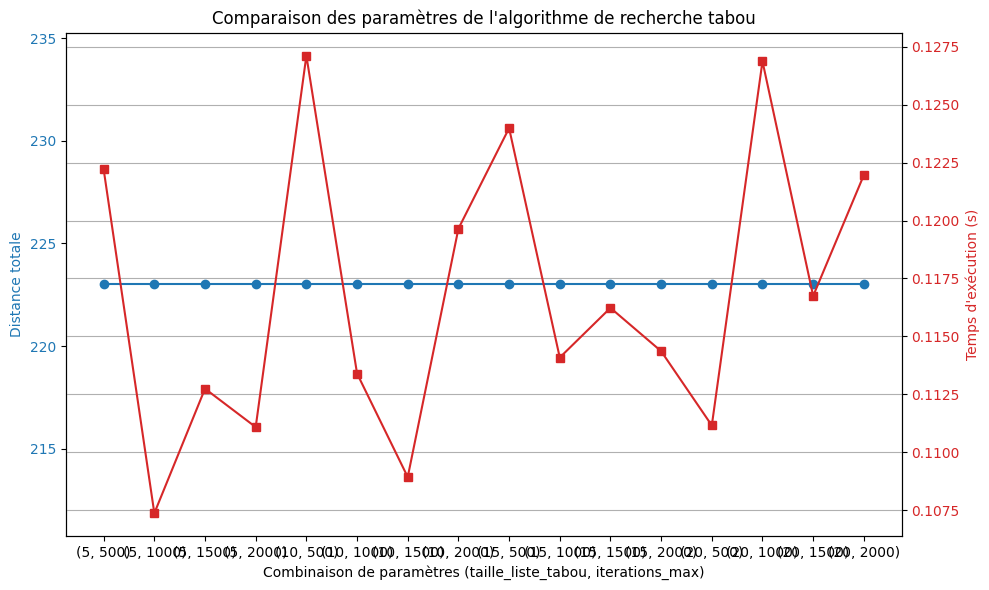

In [73]:
import matplotlib.pyplot as plt
import time

def run_tabu_search(matrice_distances, taille_liste_tabou, iterations_max):
    debut = time.time()  # Enregistrer le temps de début
    meilleure_solution, meilleure_distance = recherche_tabou(matrice_distances, taille_liste_tabou, iterations_max)
    fin = time.time()  # Enregistrer le temps de fin
    temps_execution = fin - debut  # Calculer le temps d'exécution
    return meilleure_solution, meilleure_distance, temps_execution

# Définir les valeurs des paramètres à tester
tailles_listes_tabou = [5, 10, 15, 20]
iterations_max = [500, 1000, 1500, 2000]

# Stocker les résultats
resultats = {}

# Exécuter l'algorithme pour chaque combinaison de paramètres
for taille in tailles_listes_tabou:
    for it_max in iterations_max:
        meilleure_solution, meilleure_distance, temps_execution = run_tabu_search(matrice_distances, taille, it_max)
        resultats[(taille, it_max)] = (meilleure_distance, temps_execution)

# Créer le graphique
x = [str(combinaison) for combinaison in resultats.keys()]
y_distance = [resultats[combinaison][0] for combinaison in resultats.keys()]
y_temps = [resultats[combinaison][1] for combinaison in resultats.keys()]

fig, ax1 = plt.subplots(figsize=(10, 6))

# Tracer la distance totale de la meilleure solution
color = 'tab:blue'
ax1.set_xlabel('Combinaison de paramètres (taille_liste_tabou, iterations_max)')
ax1.set_ylabel('Distance totale', color=color)
ax1.plot(x, y_distance, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Créer un axe y supplémentaire pour le temps d'exécution
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Temps d\'exécution (s)', color=color)
ax2.plot(x, y_temps, marker='s', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Comparaison des paramètres de l\'algorithme de recherche tabou')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


Lors de l'analyse des résultats obtenus avec différentes combinaisons de paramètres pour l'algorithme du plus proche voisin, il apparaît que le coût total du parcours reste constant, quelle que soit la variation des paramètres. Cependant, il est crucial de noter que ces paramètres ont un impact significatif sur le temps nécessaire à l'exécution de l'algorithme. Par exemple, en augmentant la taille de la liste tabou ou le nombre maximum d'itérations, on peut observer une augmentation du temps d'exécution.

# **Conclusion :**

Dans notre étude comparative des trois méthodes pour résoudre le Problème du Voyageur de Commerce (PVC), nous avons observé des différences significatives en termes de qualité des solutions et de temps de calcul.

L'Algorithme du Recuit Simulé a produit une solution optimale avec un chemin optimal de longueur 546. Cependant, son temps de calcul était relativement long, nécessitant une exploration approfondie de l'espace de recherche.

La méthode "First Admissible Move" a généré une solution avec un coût de 282. Bien que cette méthode soit rapide, elle peut être limitée par sa capacité à trouver des optima locaux, ce qui pourrait affecter la qualité de la solution obtenue.

En revanche, l'Algorithme de Recherche Tabou a trouvé une solution avec un coût de 223, ce qui suggère qu'il a pu éviter certains optima locaux et trouver une solution de haute qualité. Cependant, cela a nécessité un temps de calcul plus long que la méthode "First Admissible Move", mais il reste plus rapide que l'Algorithme du Recuit Simulé.

En conclusion, bien que chaque méthode ait ses avantages et ses inconvénients, l'Algorithme de Recherche Tabou semble offrir un bon compromis entre qualité de la solution et temps de calcul, fournissant une solution de haute qualité dans un temps raisonnable.